Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
images=digits.images
targets=digits.target

images=images.reshape(len(images),8*8)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

In [6]:
# Definir o grid de parâmetros para busca
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Prever as classes para o conjunto de teste com o melhor modelo encontrado
y_pred = grid_search.best_estimator_.predict(X_test)

# Imprimir a precisão da Decision Tree com os melhores parâmetros
print("Precisão com os melhores parâmetros:", grid_search.best_score_)

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Precisão com os melhores parâmetros: 0.8594439605110337


In [7]:
# Imprimir a precisão da Decision Tree
print("Precisão:", grid_search.score(X_test, y_test))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Precisão: 0.8888888888888888
Accuracy: 88.89%
Confusion Matrix

[[31  0  0  0  1  0  0  1  0  0]
 [ 0 26  0  0  0  0  0  0  0  2]
 [ 0  0 26  1  1  0  0  2  3  0]
 [ 0  2  2 29  0  0  1  0  0  0]
 [ 0  0  0  0 40  1  1  1  0  3]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 1  0  0  0  1  0 32  0  1  0]
 [ 1  0  0  0  3  0  0 30  0  0]
 [ 0  0  0  1  2  1  0  1 25  0]
 [ 0  0  0  1  2  0  0  1  0 36]]


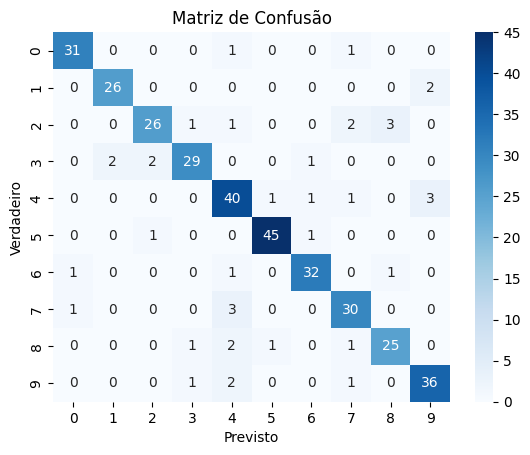

In [5]:
#Mostrar como heatmap
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()